In [1]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

In [2]:
# Replace <Subscription Key> with your valid subscription key.
subscription_key = "2fcc703891ea43eaa81f0acf5d95f6ef"

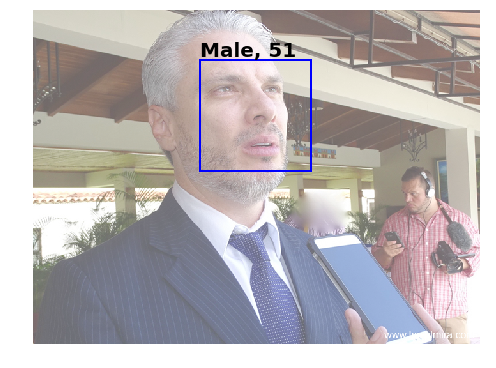

In [4]:
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# Set image_url to the URL of an image that you want to analyze.
#image_url = 'https://pbs.twimg.com/profile_images/1039939576842911746/M_hDz6PK_400x400.jpg'
image_url = 'http://www.tiazelmira.com/v08/wp-content/uploads/2017/07/Norval-Calvo1.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}
data = {'url': image_url}
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")